In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import nltk #For tokenizing and normalizing
import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

## Artificially constructed data source

In this section, I generated 10 distinct artifical datasets using the random, xorSplit, andSplit, targetsplit, and multiBlobs functions. I used two noise parameters: 0.2 and 0.4 to examine how different classifiers captured the pattern. Classifer that produced the lowest error rate is considered the "best".

In random data pattern, the two classes are randomly distributed across both dimensions. Since there is no data pattern associated with random points, all the classifiers produce an error rate at around 0.5. When the noise parameter is set at 0.2, SVM, logistic regression, decision tree, random forest, and gradient boosting classifers produced an error rate slightly below 0.5. When the noise parameter is set to 0.4, neural network model has the lowest error rate. Overall, there is no "best" model for random data points.

In andSplit, the two classes are linearly split along one of the dimensions. Hence, a linear model for classification will work best in this case. At both 0.2 and o.4 noise levels, Gaussian and Logistic Regression produced the lowest error rate. These simple classifier leads to better generalization for linearly separated data in small dataset.

In xorSplit, the two classes are split, oppositely, along each dimension. Hence, a linear model will not be the best option. At both 0.2 and o.4 noise levels, Neural Network (MLP) and Gradient Boosting classifers produced the lowest error rate. KNN, Decision Tree, and Random Forest classifers also worked well when the noise parameter is 0.2, but they generated higher error rate when noise level is higher.

In targetSplit, one class is nested within the other in two dimensions. At both 0.2 and o.4 noise levels, Gaussian, KNN, and Neural Network (MLP) produced the lowest error rate. All methods are able to fit non-linear models and they work for multi-dimensional data. By looking at the decision boundaries of these classifiers, it is clear that these methods group data points into circles, which ensures high accuracy and density of points in the circles.

In multiBlobs, 5 classes are placed as bivariate Gaussians at random locations. Of course, at noise level 0.2, Gaussian classifer worked best for the data, and produced error rates of 0 for all 5 classes. However, when noise level increases to 0.4, the method produced higher error rates. At both noise levels, Gradient Boosting produced pretty low error rate as it supports multi-class classification. Neural Network (MLP) classifier also worked well at noise level 0.4 as their decision boundary incorporates most of the data into the right place.

## Empirical datasets

In training the empirical datasets, I continue to use error rate as the measure of the "best" classifier.

For Newsgroups, 20 newsgroups are classified into 4 categories. Neural Network (MLP) classifer produced the lowest average error rate of these categories. MLP takes in a multi-dimensional input and generates a multi-dimensional output. It can have more than one non-linear layers and is able to learn non-linear model in real-time. MLP classifier uses backpropagation to train the method, thus producing high accuracy.

For Senate Small, senator press releases are classified by 2 senators. Random Forest and Gradient Boosting classifier produced the lowest error rate (near 0). Both methods combine the outputs from individual trees and are able to handle difficult hypotheses.

For Senate Large, senate press releases are classified by 5 senators. Decision Tree and Random Forest classifiers produced the lowest average error rate. Both methods work well on large and multidimensional dataset without overfitting the model.

For Email Spam dataset, emails are classified as either Spam or Ham. Neural Network (MLP) classifier produced the lowest error rate. The algorithm is intended for supervised learning in smaller datasets. The flexible hidden layer may help boost the accuracy rate and precision.


## New classifier: AdaBoost

The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data. The predictions from all of the iterations are then combined through a weighted majority vote (or sum) to produce the final prediction.

For the artifical dataset, I used data generated by targetSplit at noise level 0.2. After fitting the AdaBoost Classifier to the dataset, it produced an error rate of 0.14. This error rate is higher than that produced by Gaussian, KNN, and Neural Network(MLP) classifier. One disadvantage of Adaboost is that it is vulnerable to uniform noise. Weak classifiers being too weak can lead to low margins and overfitting. Also, it works better in large dataset as it learns from the results of previous classifiers to update the new classifier.

After applying AdaBoost Classifer to Email Spam dataset, it produced an error rate at around 0.1. This error rate is slightly higher than that of Neural Network (MLP), but still, can be considered as a low error rate. The advantage of MLP classifier over AdaBoost classifier might be that the former non-linear model is more flexible and learns features more accurately. Adaboost can be used on top of other ML algorithms to improve the learning mechanism.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.

## Health Care Services ticketing system

In [84]:
appointment_small = pandas.read_csv('/Users/reneehu/Desktop/Content-Analysis-2020/week-3/appointment_small.csv')
appointment_small.head()

,fileid,text,data,category,sub_category,previous_appointment,ID
0,2.020000e+12,Pt aware that he needs ROV for refill,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRESCRIPTION,REFILL,No,2015_5_6133_1001
1,2.020000e+12,Mom wants to know if the Focalin needs some do...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6134_1001
2,2.020000e+12,pt called to discuss nortryptiline. she says s...,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,ASK_A_DOCTOR,MEDICATION RELATED,No,2015_5_6135_1001
3,2.020000e+12,FYI Nortryptline medication.,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,MISCELLANEOUS,OTHERS,No,2015_5_6136_1001
4,2.020000e+12,Letter of patient establishment request,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,MISCELLANEOUS,"SHARING OF HEALTH RECORDS (FAX, E-MAIL, ETC.)",No,2015_5_6137_1001


In [85]:
appointment_small = appointment_small.dropna()
appointment_small['is_appointment'] = [s == 'APPOINTMENTS' for s in appointment_small['category']]

In [86]:
appointment_small['tokenized_text'] = appointment_small['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
appointment_small['normalized_text'] = appointment_small['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [87]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(appointment_small, holdBackFraction=holdBackFraction)

In [88]:
print(len(train_data_df))
print(len(test_data_df))

1500
375


## Logistic Regression

In [89]:
# set max_df=500, min_df=1
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=500, min_df=1, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

In [90]:
TFVects.shape

(1500, 1459)

In [91]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [92]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [93]:
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


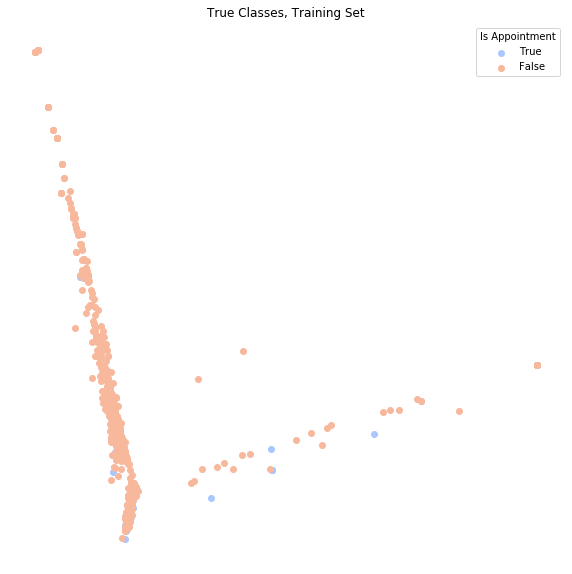

In [94]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Appointment
a = np.stack(train_data_df[train_data_df['is_appointment']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot Not Appointment
a = np.stack(train_data_df[train_data_df['is_appointment'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Appointment')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish appointments very well. We will perform a Principal Components Analysis to reduce the explanatory variables.

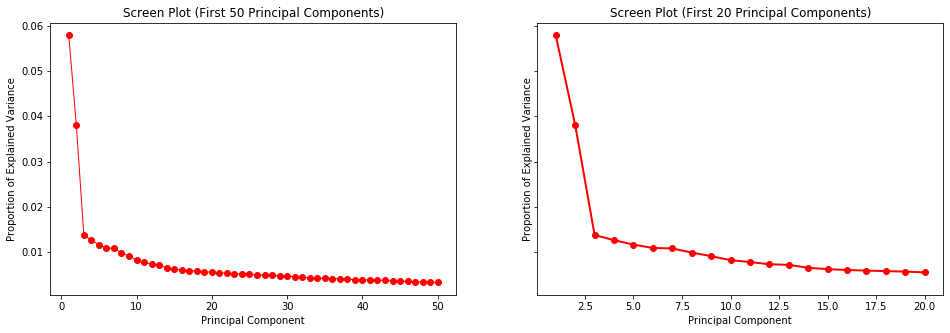

In [95]:
n = len(train_data_df)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(50) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax1.set_title('Screen Plot (First 50 Principal Components)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax2.set_title('Screen Plot (First 20 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')

plt.show()

According to the elbow point, I'll choose the first 5 principal components as my covariates.

In [96]:
train_data_df['pca_reduced_5'] = train_data_df['pca'].apply(lambda x: x[:5])

In [97]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_5'], axis=0), train_data_df['is_appointment'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
print('Training:')
print(logistic.score(np.stack(train_data_df['pca_reduced_5'], axis=0), train_data_df['is_appointment']))

Training:
0.8446666666666667


Logistic model fits our data quite well. Let's see how it performs on the testing dataset.

In [99]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_5'] = test_data_df['pca'].apply(lambda x: x[:5])

#Test
print('Testing:')
print(logistic.score(np.stack(test_data_df['pca_reduced_5'], axis=0), test_data_df['is_appointment']))

Testing:
0.856


Shall we use more dimension?

In [100]:
train_data_df['pca_reduced_20'] = train_data_df['pca'].apply(lambda x: x[:20])
test_data_df['pca_reduced_20'] = test_data_df['pca'].apply(lambda x: x[:20])

logistic.fit(np.stack(train_data_df['pca_reduced_20'], axis=0), train_data_df['is_appointment'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_20'], axis=0), train_data_df['is_appointment']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_20'], axis=0), test_data_df['is_appointment']))

Training:
0.8793333333333333
Testing:
0.88


In [101]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['is_appointment'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['is_appointment']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['is_appointment']))

Training:
0.884
Testing:
0.88


Using a logistic regression, we get a prediction accuracy at around 85%. We can also try a logistic regression with an L1 regularization or L1-norm loss function.

In [102]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['is_appointment'])
print('Training:')
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['is_appointment']))

Training:
0.9166666666666666


In [103]:
print('Testing:')
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['is_appointment']))

Testing:
0.904


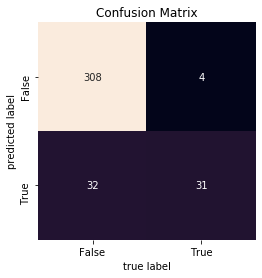

In [104]:
# since the plotConfusionMatrix function requires a 'category' column, I changed the existing 'category'
# column to the binary classification column 'is_appointment'.
test_data_df['category'] = test_data_df['is_appointment']
lucem_illud_2020.plotConfusionMatrix(logistic_l1, test_data_df)

In [107]:
test_data_df['lg_predict'] = logistic_l1.predict(np.stack(test_data_df['vect'], axis=0))

In [108]:
print('Precision:')
print(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['lg_predict']))
print('Recall:')
print(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['lg_predict']))
print('F-measures:')
print(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['lg_predict']))

Precision:
0.8857142857142857
Recall:
0.49206349206349204
F-measures:
0.6326530612244897


Using a logistic regression with L1 regularization, both training and testing accuracy and precision increases.

In [109]:
lucem_illud_2020.metrics.evaluateClassifier(logistic_l1, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.096,0.739621,0.905882,0.904935,0.987179
True,0.096,0.739621,0.885714,0.521161,0.492063


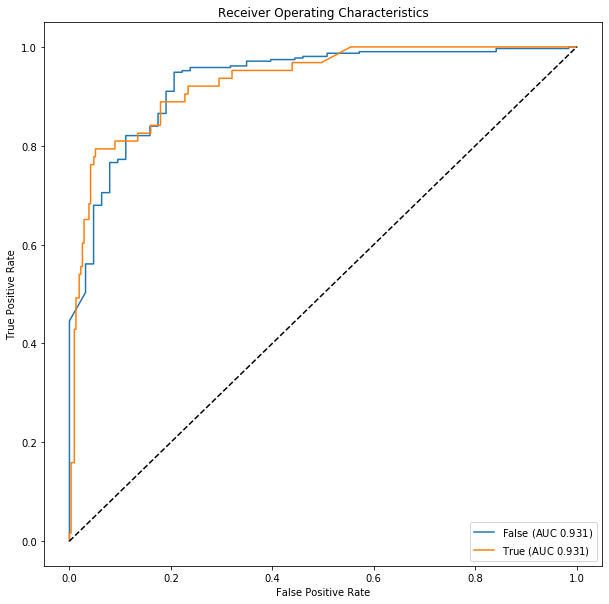

In [110]:
lucem_illud_2020.plotMultiROC(logistic_l1, test_data_df)

### Load extrapolation dataset...

In [111]:
appointment_extra = pandas.read_csv('/Users/reneehu/Desktop/Content-Analysis-2020/week-3/extrapolation.csv')
appointment_extra.head()

,field,text,data,sub_category,previous_appointment,ID
0,2.020000e+12,Pt's wife requests MD call about pt depression,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,NEW APPOINTMENT,No,2015_1_4475_1001
1,2.020000e+12,"Need PA for Rozerem, if can't get this done to...",{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,PRIOR AUTHORIZATION,No,2015_1_4476_1001
2,2.020000e+12,Pharmacy advises non-formulary on Lunesta & Ro...,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,QUERIES FROM PHARMACY,No,2015_1_4477_1001
3,2.020000e+12,Metadate Refill,{\rtf1\ansi\ftnbj{\fonttbl{\f0 \fswiss Arial;}...,REFILL,No,2015_1_4478_1001
4,2.020000e+12,Rx Refill Hydrocodone,xxxx-xxxx\f0 \fswiss Arial;}}{\colortbl ;\red2...,REFILL,No,2015_1_4479_1001


In [112]:
appointment_extra.dropna(inplace=True)
appointment_extra['tokenized_text'] = appointment_extra['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
appointment_extra['normalized_text'] = appointment_extra['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [116]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=500, min_df=1, stop_words='english', norm='l2')
TFVects_extra = TFVectorizer.fit_transform(appointment_extra['text'])
appointment_extra['vect'] = [np.array(v).flatten() for v in TFVects_extra.todense()]

In [ ]:
appointment_extra['l1_predict'] = logistic_l1.predict(np.stack(appointment_extra['vect'], axis=0))

## Naive Bayes

In [117]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['is_appointment'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [118]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['is_appointment']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['is_appointment']))

Training:
0.908
Testing:
0.896


In [119]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))

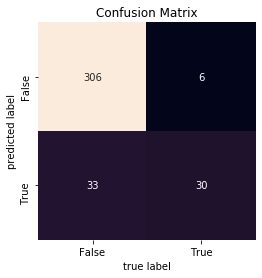

In [120]:
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_data_df)

Calculate the precision, recall, and F-measures:

In [121]:
print('Precision:')
print(sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict']))
print('Recall:')
print(sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict']))
print('F-measures:')
print(sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict']))

Precision:
0.8333333333333334
Recall:
0.47619047619047616
F-measures:
0.6060606060606061


In [122]:
lucem_illud_2020.metrics.evaluateClassifier(naiveBayes, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.104,0.72848,0.902655,0.901296,0.980769
True,0.104,0.72848,0.833333,0.484825,0.476190


ROC Visualization:

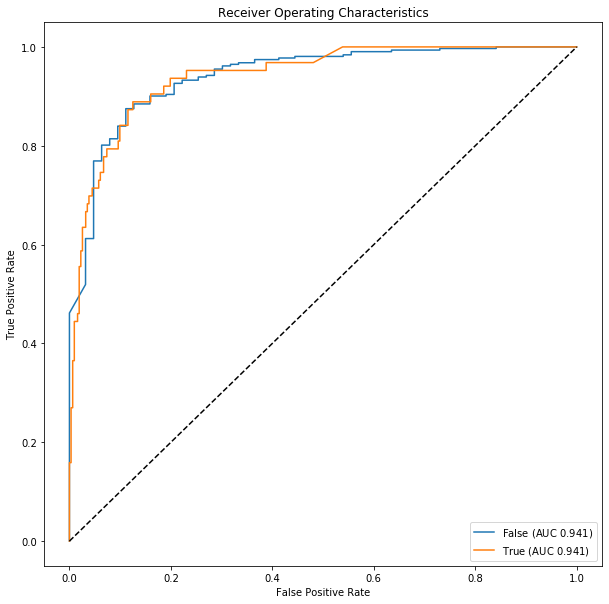

In [123]:
lucem_illud_2020.plotMultiROC(naiveBayes, test_data_df)

In [ ]:
appointment_extra['nb_predict'] = naiveBayes.predict(np.stack(appointment_extra['vect'], axis=0))

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

In [125]:
# Reload the dataset
appointment_small = pandas.read_csv('/Users/reneehu/Desktop/Content-Analysis-2020/week-3/appointment_small.csv')
appointment_small = appointment_small.dropna()
appointment_small['tokenized_text'] = appointment_small['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
appointment_small['normalized_text'] = appointment_small['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [126]:
holdBackFraction = .2
train_tree_df, test_tree_df = lucem_illud_2020.trainTestSplit(appointment_small, holdBackFraction=holdBackFraction)

In [127]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=500, min_df=1, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_tree_df['text'])
train_tree_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [128]:
TFVects_test = TFVectorizer.transform(test_tree_df['text'])
test_tree_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

## Decision Trees

In [129]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_tree_df['vect'], axis =0), train_tree_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

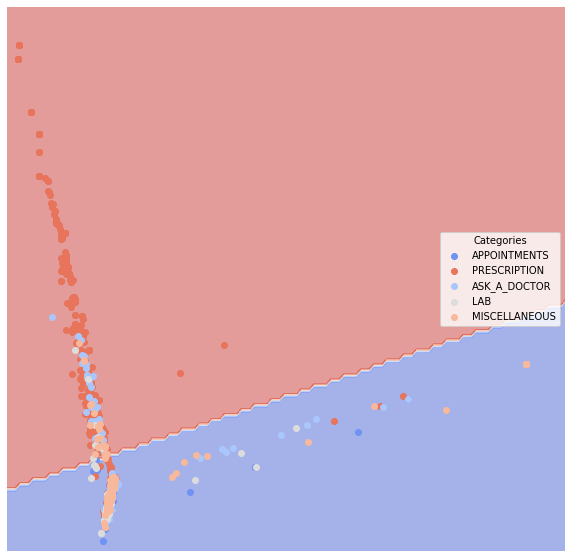

In [130]:
lucem_illud_2020.plotregions(clf_tree, train_tree_df)

In [131]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_tree_df)

/Users/reneehu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
APPOINTMENTS,0.125333,0.719915,0.923077,0.532718,0.450000
PRESCRIPTION,0.240000,0.720161,0.873563,0.638994,0.490323
ASK_A_DOCTOR,0.514667,0.638944,0.209402,0.201345,0.859649
LAB,0.037333,0.757143,0.866667,0.482667,0.520000
MISCELLANEOUS,0.154667,0.500000,0.000000,0.154667,0.000000


In [132]:
print('Accuracy:')
print(sklearn.metrics.accuracy_score(test_tree_df['category'],clf_tree.predict(np.stack(test_tree_df['vect'], axis = 0))))

Accuracy:
0.464


Low accuracy because ASK_A_DOCTOR category has high error rate, nearly 0.5.

In [133]:
print('Precision:')
print(sklearn.metrics.precision_score(test_tree_df['category'],clf_tree.predict(np.stack(test_tree_df['vect'], axis = 0)), average = 'weighted'))
print('Recall:')
print(sklearn.metrics.recall_score(test_tree_df['category'],clf_tree.predict(np.stack(test_tree_df['vect'], axis = 0)), average = 'weighted'))
print('F-measures:')
print(sklearn.metrics.f1_score(test_tree_df['category'],clf_tree.predict(np.stack(test_tree_df['vect'], axis = 0)), average = 'weighted'))

Precision:
0.6476027114647804
Recall:
0.464
F-measures:
0.4832122920907309


/Users/reneehu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/reneehu/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


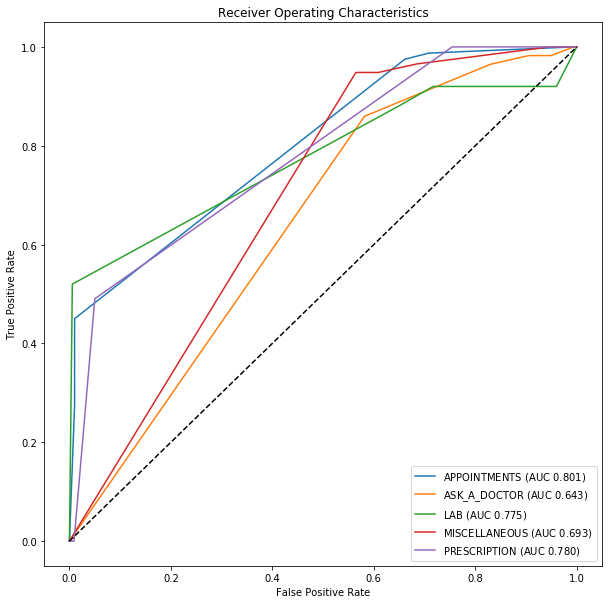

In [134]:
lucem_illud_2020.plotMultiROC(clf_tree, test_tree_df)

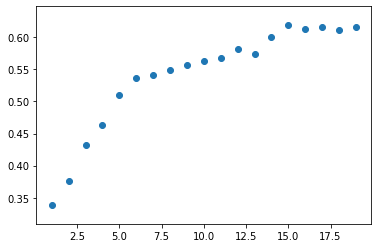

In [135]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(train_tree_df['vect'], axis =0), train_tree_df['category'])
    score = sklearn.metrics.accuracy_score(test_tree_df['category'], tree2.predict(np.stack(test_tree_df['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

In [ ]:
appointment_extra['tree_predict'] = clf_tree.predict(np.stack(appointment_extra['vect'], axis = 0))

## Random Forest

In [138]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10)

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) 

In [139]:
bag.fit(np.stack(train_tree_df['vect'], axis =0), train_tree_df['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

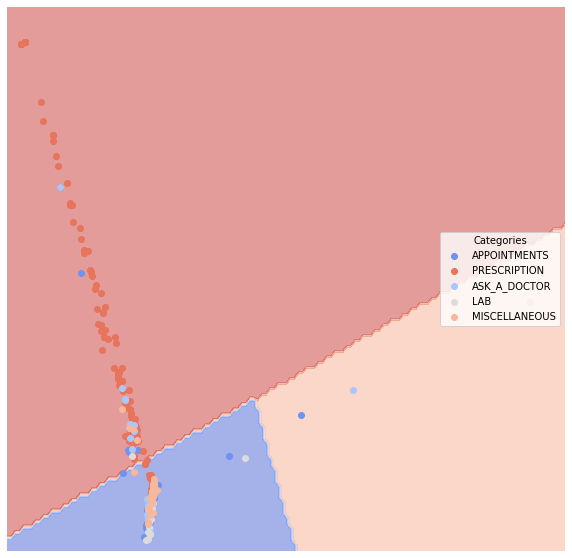

In [140]:
lucem_illud_2020.plotregions(bag, test_tree_df)

In [141]:
lucem_illud_2020.evaluateClassifier(bag, test_tree_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
APPOINTMENTS,0.109333,0.757415,0.933333,0.591333,0.525000
PRESCRIPTION,0.154667,0.831012,0.859259,0.747059,0.748387
ASK_A_DOCTOR,0.301333,0.707133,0.297101,0.256371,0.719298
LAB,0.032000,0.797143,0.882353,0.556078,0.600000
MISCELLANEOUS,0.138667,0.671462,0.575000,0.321351,0.396552


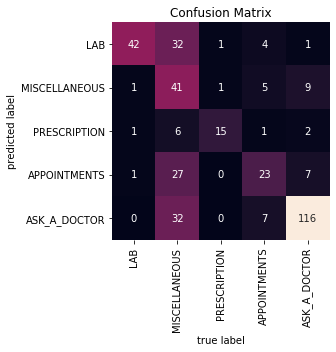

In [142]:
lucem_illud_2020.plotConfusionMatrix(bag, test_tree_df)

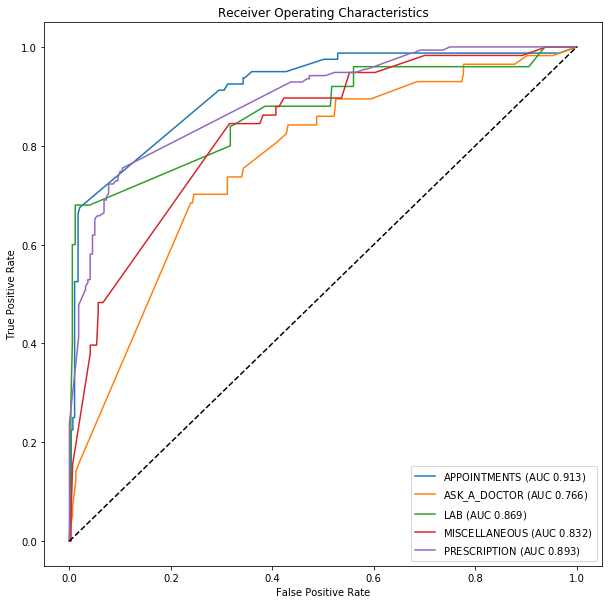

In [143]:
lucem_illud_2020.plotMultiROC(bag, test_tree_df)

Ensemble learning makes many randomized estimators and combines them, ultimately producing a better classification. A random forest is produced by bagging decision trees. The error rate for each category decreases and precision increases.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC).

## K-Nearest Neighbors

In [144]:
n_neighbors = 5
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [145]:
clf_knearest.fit(np.stack(train_tree_df['vect'], axis = 0), train_tree_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [146]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_tree_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
APPOINTMENTS,0.084000,0.876513,0.743243,0.638939,0.814815
PRESCRIPTION,0.116667,0.864650,0.880000,0.774324,0.792793
ASK_A_DOCTOR,0.154000,0.823646,0.594595,0.511181,0.785714
LAB,0.036667,0.781900,0.782609,0.476250,0.574468
MISCELLANEOUS,0.126000,0.756374,0.684211,0.468977,0.571429


In [148]:
test_tree_df['knn_predict'] = clf_knearest.predict(np.stack(test_tree_df['vect'], axis=0))

print("Testing:")
print(clf_knearest.score(np.stack(test_tree_df['vect'], axis=0), test_tree_df['category']))

Testing:
0.6506666666666666


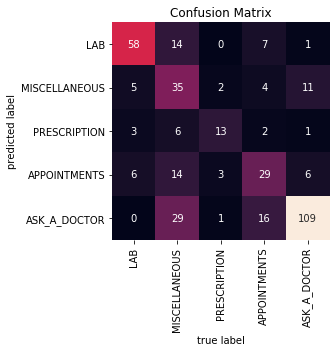

In [149]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_tree_df)

In [152]:
print('Precision:')
print(sklearn.metrics.precision_score(test_tree_df['category'],test_tree_df['knn_predict'], average = 'weighted'))
print('Recall:')
print(sklearn.metrics.recall_score(test_tree_df['category'],test_tree_df['knn_predict'], average = 'weighted'))
print('F-measures:')
print(sklearn.metrics.f1_score(test_tree_df['category'],test_tree_df['knn_predict'], average = 'weighted'))

Precision:
0.7010641012252854
Recall:
0.6506666666666666
F-measures:
0.6665775669913726


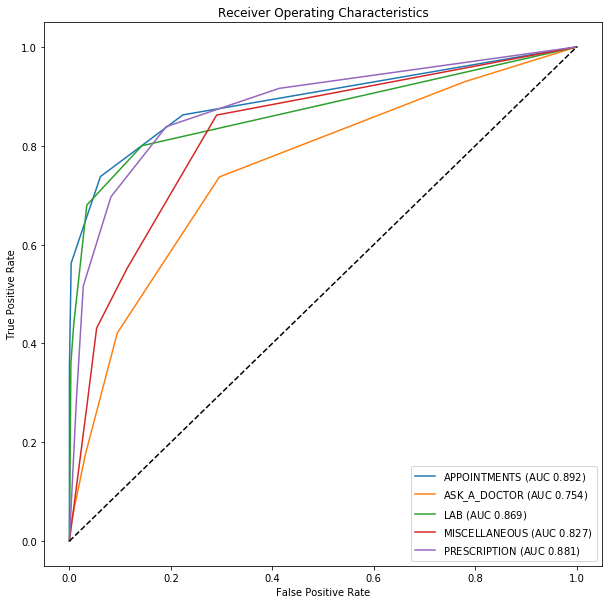

In [153]:
lucem_illud_2020.plotMultiROC(clf_knearest, test_tree_df)

KNN produced even lower error rates for each category. AUC is also high.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [154]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_tree_df['vect'], axis=0), train_tree_df['category'])

/Users/reneehu/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [155]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_tree_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
APPOINTMENTS,0.104000,0.815466,0.805970,0.613363,0.675000
PRESCRIPTION,0.152000,0.841862,0.822368,0.743200,0.806452
ASK_A_DOCTOR,0.170667,0.676183,0.440678,0.283678,0.456140
LAB,0.037333,0.831429,0.739130,0.523942,0.680000
MISCELLANEOUS,0.154667,0.760606,0.500000,0.374966,0.637931


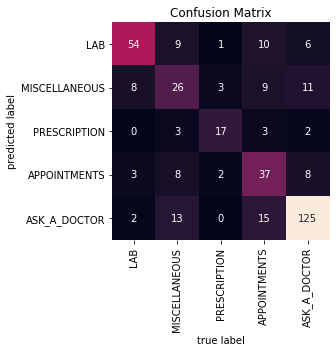

In [156]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_tree_df)

In [157]:
print('Precision:')
print(sklearn.metrics.precision_score(test_tree_df['category'],clf_nn.predict(np.stack(test_tree_df['vect'], axis = 0)), average = 'weighted'))
print('Recall:')
print(sklearn.metrics.recall_score(test_tree_df['category'],clf_nn.predict(np.stack(test_tree_df['vect'], axis = 0)), average = 'weighted'))
print('F-measures:')
print(sklearn.metrics.f1_score(test_tree_df['category'],clf_nn.predict(np.stack(test_tree_df['vect'], axis = 0)), average = 'weighted'))

Precision:
0.7054443257088486
Recall:
0.6906666666666667
F-measures:
0.695392580164888


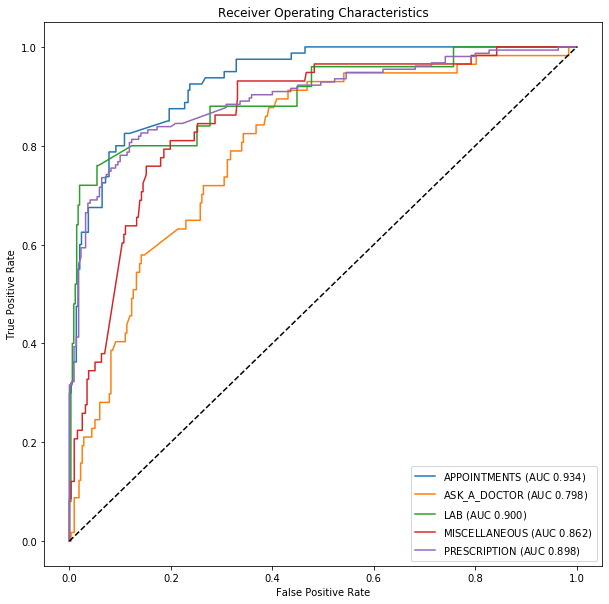

In [158]:
lucem_illud_2020.plotMultiROC(clf_nn, test_tree_df)

I used Logistic Regression with L1 regularization and Naive Bayes algorithms to perform a binary classification. Both classifers produced high training and testing accuracy. The precision, recall, F-measures, and AUC scores are pretty similar. Both methods worked well in binary classification.

For multiclass classification, I applied decision tree, random forest, K-nearest-neighbor, and neural network (MLP) approaches to the dataset. Decision tree classifier produced the highest error rate and lowest prediction accuracy. It only roughly groups the data points into two distinct categories. Both KNN and MLP classifiers decreased error rates significantly (especially in ASK_A_DOCTOR category), while MLP classifers produced the highest score on accuracy. According to the ROC visualization, MLP produced more fine grained classifications that allow the model to classify relevant data points into each category more accurately.